In [1]:
%matplotlib inline

In [2]:
# stdlib imports
from datetime import datetime
import io

# Third party imports
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Local imports
from libcomcat.dataframes import (get_detail_data_frame, get_dyfi_data_frame,
                                  get_history_data_frame, get_magnitude_data_frame,
                                  get_pager_data_frame, get_phase_dataframe,
                                  get_summary_data_frame)
from libcomcat.search import search, get_event_by_id


# Dataframes Overview
----

The libcomcat library includes tools to output datafames (and spreadsheets) of event and product information. Dataframe tools include: `get_detail_data_frame`, `get_dyfi_data_frame`, `get_history_data_frame`, `get_magnitude_data_frame`, `get_pager_data_frame`, `get_phase_dataframe`, and `get_summary_data_frame`.


## Contents
----
- [Summary Dataframe](#Summary-Dataframe)
- [Detail Dataframe](#Detail-Dataframe)
- [DYFI Dataframe](#DYFI-Dataframe)
- [Event History Dataframe](#Event-History-Dataframe)
- [Magnitude Dataframe](#Magnitude-Dataframe)
- [Pager Dataframe](#Pager-Dataframe)
- [Phase Dataframe](#Phase-Dataframe)

## Summary Dataframe
Similar to the detail dataframe, the summary dataframe orgnizes the basic information for a set of events.

Inputs:
- **events**: List of Summary Event objects.
    
    
Returns:
- Dataframe of the summary information with columns:
    - id
    - time
    - latitude
    - longitude
    - depth
    - magnitude
    - alert
    - url


In [3]:
summary_events = search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 1, 18, 12, 35),
                   maxradiuskm=2, latitude=34.213, longitude=-118.537)
summary_df = get_summary_data_frame(summary_events)
display(HTML(summary_df.to_html()))

,id,time,location,latitude,longitude,depth,magnitude,alert,url
0,ci3144585,1994-01-17 12:30:55.390,"1km NNW of Reseda, CA",34.213,-118.537,18.202,6.70,None,https://earthquake.usgs.gov/earthquakes/eventpage/ci3144585
1,ci3141071,1994-01-17 23:56:15.480,"2km WNW of Reseda, California",34.212,-118.552,19.391,2.68,None,https://earthquake.usgs.gov/earthquakes/eventpage/ci3141071
2,ci3141138,1994-01-18 02:49:53.810,"2km SE of Northridge, California",34.221,-118.521,17.316,2.60,None,https://earthquake.usgs.gov/earthquakes/eventpage/ci3141138
3,ci3141149,1994-01-18 03:08:07.740,"1km S of Northridge, California",34.223,-118.536,17.147,2.60,None,https://earthquake.usgs.gov/earthquakes/eventpage/ci3141149
4,ci2150661,1994-01-18 04:04:57.940,"1km WNW of Reseda, California",34.204,-118.541,19.395,2.34,None,https://earthquake.usgs.gov/earthquakes/eventpage/ci2150661
5,ci2158418,1994-01-18 06:15:06.100,"1km NNW of Reseda, California",34.207,-118.535,14.124,2.47,None,https://earthquake.usgs.gov/earthquakes/eventpage/ci2158418
6,ci3141378,1994-01-18 08:38:26.840,"2km N of Reseda, California",34.216,-118.534,18.891,1.80,None,https://earthquake.usgs.gov/earthquakes/eventpage/ci3141378


## Detail Dataframe
There is a lot of information stored in the DetailEvent object. A detail DataFrame organizes that information into a spreedsheet.

Inputs:
- **events**: List of Summary Event objects.
- **get_all_magnitudes**: Default is false.
- **get_tensors**: Options include 'none', 'preferred', and 'all'. Default is 'preferred'.
- **get_focals**: Options include 'none', 'preferred', and 'all'. Default is 'preferred'.
- **get_moment_supplement**: Indicates whether derived origin and double-couple/source time information should be extracted; if it is available. Default is false.

Returns:
- Dataframe of the detailed event information with columns:
    - id
    - time
    - latitude
    - longitude
    - depth
    - magnitude
    - location
    - magtype (magnitude type)
    - url
    - alert
    - (any additionaly columns for focal mechanisms and moment)

In [4]:
summary_events = search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 1, 18, 12, 35),
                   maxradiuskm=2, latitude=34.213, longitude=-118.537)
detail_df = get_detail_data_frame(summary_events)
display(HTML(detail_df.to_html()))

,id,time,latitude,longitude,depth,magnitude,location,magtype,url,alert,duputel_Mww_mrr,duputel_Mww_mtt,duputel_Mww_mpp,duputel_Mww_mrt,duputel_Mww_mrp,duputel_Mww_mtp,duputel_Mww_np1_strike,duputel_Mww_np1_dip,duputel_Mww_np1_rake,duputel_Mww_np2_strike,duputel_Mww_np2_dip,duputel_Mww_np2_rake,gcmt_np1_strike,gcmt_np1_dip,gcmt_np1_rake,gcmt_np2_strike,gcmt_np2_dip,gcmt_np2_rake
0,ci3144585,1994-01-17 12:30:55.390,34.213,-118.537,18.202,6.70,"1km NNW of Reseda, CA",mw,https://earthquake.usgs.gov/earthquakes/eventpage/ci3144585,None,1.189000e+19,-1.027000e+19,-1.613000e+18,-4.363000e+17,-1.977000e+18,4.262000e+18,121,46,102,283,44,76,278,42,65,130,53,111
1,ci3141071,1994-01-17 23:56:15.480,34.212,-118.552,19.391,2.68,"2km WNW of Reseda, California",ml,https://earthquake.usgs.gov/earthquakes/eventpage/ci3141071,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ci3141138,1994-01-18 02:49:53.810,34.221,-118.521,17.316,2.60,"2km SE of Northridge, California",ml,https://earthquake.usgs.gov/earthquakes/eventpage/ci3141138,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ci3141149,1994-01-18 03:08:07.740,34.223,-118.536,17.147,2.60,"1km S of Northridge, California",ml,https://earthquake.usgs.gov/earthquakes/eventpage/ci3141149,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ci2150661,1994-01-18 04:04:57.940,34.204,-118.541,19.395,2.34,"1km WNW of Reseda, California",mc,https://earthquake.usgs.gov/earthquakes/eventpage/ci2150661,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ci2158418,1994-01-18 06:15:06.100,34.207,-118.535,14.124,2.47,"1km NNW of Reseda, California",mc,https://earthquake.usgs.gov/earthquakes/eventpage/ci2158418,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ci3141378,1994-01-18 08:38:26.840,34.216,-118.534,18.891,1.80,"2km N of Reseda, California",mh,https://earthquake.usgs.gov/earthquakes/eventpage/ci3141378,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DYFI Dataframe
There may be many 'Did You Feel It?' (DYFI) responses for any given event. The intensity and distance may need to be observed to better understand the extent of the earthquake's effect. The DYFI dataframe records the location, distance, intensity, and number of responses associated with a report.

Inputs:
- **detail**: Detail event object.
- **dyfi_file**: Defines the resolutions for the DYFI product
- **version**: Which DYFI version will be used. Options include 'first', 'last', 'preferred', 'all'.

Returns:
- Dataframe of the DYFI information with columns:
    - station
    - lat
    - lon
    - distance
    - intensity
    - nresp (number of responses)

In [5]:
dyfi_event = get_event_by_id('us2000h8ty')
dyfi_df = get_dyfi_data_frame(dyfi_event)
display(HTML(dyfi_df.to_html()))

,station,lat,lon,distance,intensity,nresp
0,UTM:(53S 0547 3835 1000),34.660342,135.518397,1051,1.0,1
1,UTM:(54S 0389 3951 1000),35.701238,139.778575,798,1.0,1
2,UTM:(54S 0400 3959 1000),35.774525,139.899150,787,1.0,1
3,UTM:(54S 0489 4224 1000),38.168337,140.880128,510,2.7,1
4,UTM:(54S 0490 4233 1000),38.249460,140.891423,501,2.0,1
5,UTM:(54S 0491 4233 1000),38.249470,140.902850,501,2.0,1
6,UTM:(54S 0509 4350 1000),39.303830,141.110177,383,2.7,1
7,UTM:(54S 0514 4396 1000),39.718245,141.169173,337,2.0,1
8,UTM:(54T 0456 4493 1000),40.591150,140.485925,264,2.0,1
9,UTM:(54T 0461 4757 1000),42.969170,140.527885,123,2.0,1


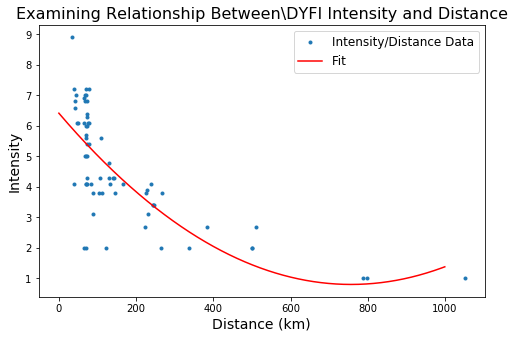

In [6]:
dist = dyfi_df['distance'].values
intensity = dyfi_df['intensity'].values
ind = dist.argsort()
dist = dist[ind]
intensity = intensity[ind]
poly = np.polyfit(dist, intensity, 2)
fit = np.poly1d(poly)
d = np.arange(0, 1000, 0.5)


plt.figure(figsize=(8, 5))
plt.plot(dist, intensity, '.', label='Intensity/Distance Data')
plt.plot(d, fit(d), 'r-', label='Fit')
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.legend(fontsize=12)
plt.title('Examining Relationship Between\DYFI Intensity and Distance', fontsize=16)
plt.show()

## Event History Dataframe
For an event many combinations and versions of events may be available. The event history dataframe can be used to look at a record products for the event. See the event history notebook for more examples. **Superseded events must be included to get the full history, otherwise there will only be one version per product.**

Inputs:
- **detail**: DetailEvent object.
- **products**: Which ComCat products to include in the dataframe. If none are specified, then all are included.


Returns:
- Dataframe of the event history information with columns:
    - Update Time
    - Product
    - Authoritative Event ID
    - Code
    - Associated
    - Product Source
    - Product Version
    - Elapsed (min)
    - URL
    - Comment
    - Description
- DetailEvent Object

In [7]:
history_event = get_event_by_id('ci38996632', includesuperseded=True)
history_df = get_history_data_frame(history_event, ['dyfi', 'finite-fault',
            'focal-mechanism', 'ground-failure',
            'losspager', 'moment-tensor',
            'oaf', 'origin', 'phase-data',
            'shakemap'])
display(HTML(history_df[0].to_html()))

,Update Time,Product,Authoritative Event ID,Code,Associated,Product Source,Product Version,Elapsed (min),URL,Comment,Description
191,2019-08-22 00:32:41.736,shakemap,ci38996632,ci38996632,True,cgs,1,-1217.1,https://earthquake.usgs.gov/archive/product/shakemap/ci38996632/cgs/1566433961736/download/intensity.jpg,,MaxMMI# 6.9|Instrumented# 2|DYFI# 0|Fault# |GMPE# BA08|Mag# 5.0|Depth# 2.4
192,2019-08-22 00:54:36.283,shakemap,ci38996632,ci38996632,True,cgs,2,-1195.2,https://earthquake.usgs.gov/archive/product/shakemap/ci38996632/cgs/1566435276283/download/intensity.jpg,,MaxMMI# 6.5|Instrumented# 304|DYFI# 0|Fault# |GMPE# BA08|Mag# 5.0|Depth# 2.4
173,2019-08-22 20:51:57.410,origin,ci38996632,ci38996632,True,ci,1,2.1,https://earthquake.usgs.gov/archive/product/origin/ci38996632/ci/1566507117410/quakeml.xml,,"Magnitude# 4.5|Time# 2019-08-22 20:49:49.970000 |Time Offset (sec)# -0.1|Location# (35.909,-117.710)|Distance from Auth. Origin (km)# 0.2|Azimuth# NNW|Depth# 1.9|Magnitude Type# mlr|Location Method# unknown|Preferred Weight#156"
182,2019-08-22 20:51:57.410,phase-data,ci38996632,ci38996632,True,ci,1,2.1,https://earthquake.usgs.gov/archive/product/phase-data/ci38996632/ci/1566507117410/quakeml.xml,,"Magnitude# 4.5|Time# 2019-08-22 20:49:49.970000 |Time Offset (sec)# -0.1|Location# (35.909,-117.710)|Distance from Auth. Origin (km)# 0.2|Azimuth# NNW|Depth# 1.9|Magnitude Type# mlr|Location Method# unknown|Preferred Weight#156"
0,2019-08-22 20:52:33.151,dyfi,ci38996632,ci38996632,True,us,1,2.7,https://earthquake.usgs.gov/archive/product/dyfi/ci38996632/us/1566507153151/ci38996632_ciim_geo.jpg,,Max MMI# 2.0|NumResponses# 1
195,2019-08-22 20:53:23.972,shakemap,ci38996632,ci38996632,True,ci,1,3.6,https://earthquake.usgs.gov/archive/product/shakemap/38996632/ci/1566507203972/download/intensity.jpg,,MaxMMI# 6.2|Instrumented# 0|DYFI# 0|Fault# |GMPE# |Mag# nan|Depth# nan
196,2019-08-22 20:54:20.444,shakemap,ci38996632,ci38996632,True,ci,1,4.5,https://earthquake.usgs.gov/archive/product/shakemap/ci38996632/ci/1566507260444/download/intensity.jpg,,MaxMMI# 6.5|Instrumented# 361|DYFI# 0|Fault# |GMPE# BA08|Mag# 4.5|Depth# 1.9
183,2019-08-22 20:54:51.970,phase-data,ci38996632,ci38996632,True,ci,2,5.0,https://earthquake.usgs.gov/archive/product/phase-data/ci38996632/ci/1566507291970/quakeml.xml,,"Magnitude# 5.0|Time# 2019-08-22 20:49:49.970000 |Time Offset (sec)# -0.1|Location# (35.909,-117.710)|Distance from Auth. Origin (km)# 0.2|Azimuth# NNW|Depth# 1.9|Magnitude Type# mw|Location Method# unknown|Preferred Weight#156"
174,2019-08-22 20:54:51.970,origin,ci38996632,ci38996632,True,ci,2,5.0,https://earthquake.usgs.gov/archive/product/origin/ci38996632/ci/1566507291970/quakeml.xml,,"Magnitude# 5.0|Time# 2019-08-22 20:49:49.970000 |Time Offset (sec)# -0.1|Location# (35.909,-117.710)|Distance from Auth. Origin (km)# 0.2|Azimuth# NNW|Depth# 1.9|Magnitude Type# mw|Location Method# unknown|Preferred Weight#156"
164,2019-08-22 20:54:59.280,moment-tensor,ci38996632,ci38996632,True,ci,1,5.2,https://earthquake.usgs.gov/archive/product/moment-tensor/ci38996632_mt1/ci/1566507299280/quakeml.xml,,Method# TMTS|Moment Magnitude# 5.0|Depth# 11|Double Couple# 0.95|NP1 Strike# nan|NP1 Dip# nan|NP1 Rake# nan


## Magnitude Dataframe
Amplitudes, periods, and magnitudes recorded at station may need to be observed and compared. The magnitude dataframe organizes this information for a given catalog and magnitude type.

Inputs:
- **eventid**: COMCAT event ID. 
- **products**: Source catalog (e.g. 'us','ak', 'preferred', etc.)
- **magtype**: Type of magnitude (e.g. 'mg', 'ml', etc.)


Returns:
- Dataframe of the magnitude information with columns:
    - Channel
    - Amplitude
    - Period
    - Status
    - Magnitude
    - Weight

In [8]:
magnitude_event = get_event_by_id('ci38996632')
magnitude_df = get_magnitude_data_frame(magnitude_event, 'us', 'mb')
display(HTML(magnitude_df.to_html()))

,Channel,Type,Amplitude,Period,Status,Magnitude,Weight
0,TX.833A.BHZ.--,mb,1.211000e-07,1.20,automatic,4.90,0.00
1,IM.ABK31.BHZ.--,mb,1.270000e-08,1.85,automatic,5.04,0.00
2,N4.ABTX.HHZ.00,mb,5.500000e-08,1.52,automatic,4.73,1.00
3,US.AGMN.BHZ.00,mb,6.180000e-08,1.30,automatic,4.78,1.00
4,II.ARTI.BHZ.00,mb,5.800000e-09,0.80,automatic,4.95,0.00
5,OK.BLOK.HHZ.--,mb,5.290000e-08,1.20,automatic,4.54,0.00
6,TX.BRDY.HHZ.00,mb,1.865000e-08,0.99,automatic,4.18,0.00
7,AK.CAST.BHZ.--,mb,5.450000e-09,1.04,automatic,4.37,0.00
8,IU.CCM.BHZ.10,mb,3.430000e-08,1.05,automatic,4.64,1.00
9,OK.CHOK.HHZ.--,mb,8.850000e-08,1.40,automatic,4.70,1.00


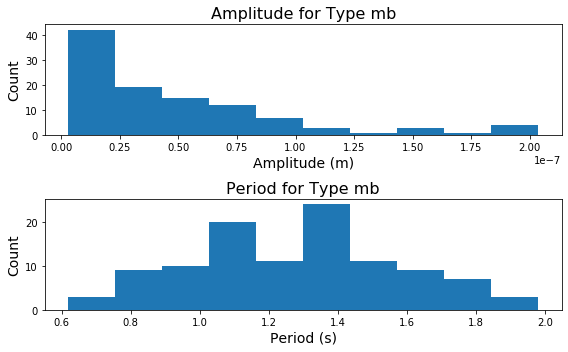

In [9]:
plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 1)
plt.hist(magnitude_df['Amplitude'])
plt.xlabel('Amplitude (m)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Amplitude for Type mb', fontsize=16)
plt.subplot(2, 1, 2)
plt.hist(magnitude_df['Period'])
plt.xlabel('Period (s)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Period for Type mb', fontsize=16)
plt.tight_layout()
plt.show()

## Pager Dataframe
Pager estimates the posulation exposed for a range of MMI intensities. The pager dataframe organizes this information in terms of total exposure and exposure by country.

Inputs:
- **detail**: Detail event object.
- **get_losses**: Defines whether or not to get predicted fatalities, monetary losses, and uncertainty.
- **get_country_exposures**: Gets shaking exposures per country.
- **get_all_version**: Whether or not to get PAGER results for all version.

Returns:
- Dataframe of the Pager information with columns:
    - id
    - location
    - time
    - latitude
    - longitude
    - depth
    - magnitude
    - (Estimated population exposure for MMI intensities 1-10)

(Returns NoneType if no pager product)


Total Exposure:

In [10]:
pager_event = get_event_by_id('us70005nie')
pager_df = get_pager_data_frame(pager_event)
display(HTML(pager_df.to_html()))

,id,location,time,latitude,longitude,depth,magnitude,country,pager_version,mmi1,mmi2,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10
0,us70005nie,"69km WSW of Constitucion, Chile",2019-09-29 15:57:53.236,-35.4756,-73.1631,11,6.7,Total,1,0,0,43972,3240204,86383,44302,0,0,0,0


Exposure by Country:

In [11]:
pager_country_df = get_pager_data_frame(pager_event, get_country_exposures=True)
display(HTML(pager_country_df.to_html()))

,id,location,time,latitude,longitude,depth,magnitude,country,pager_version,mmi1,mmi2,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10
0,us70005nie,"69km WSW of Constitucion, Chile",2019-09-29 15:57:53.236,-35.4756,-73.1631,11,6.7,Total,1,0,0,43972,3240204,86383,44302,0,0,0,0
1,us70005nie,"69km WSW of Constitucion, Chile",2019-09-29 15:57:53.236,-35.4756,-73.1631,11,6.7,UK,1,0,0,0,0,0,0,0,0,0,0
2,us70005nie,"69km WSW of Constitucion, Chile",2019-09-29 15:57:53.236,-35.4756,-73.1631,11,6.7,AR,1,0,0,995,540,0,0,0,0,0,0
3,us70005nie,"69km WSW of Constitucion, Chile",2019-09-29 15:57:53.236,-35.4756,-73.1631,11,6.7,CL,1,0,0,42977,3239664,86383,44302,0,0,0,0


## Phase Dataframe
The phase dataframe includes phase arrival data. See the phases and magnitudes dataframe for examples.

Inputs:
- **detail**: Detail event object.
- **products**: Source catalog (e.g. 'us','ak', 'preferred', etc.). Default is preferred.

Returns:
- Dataframe of the DYFI information with columns:
    - Channel
    - Distance
    - Azimuth
    - Phase
    - Arrival
    - Status
    - Residual
    - Weight
    - Agency


In [12]:
phase_event = get_event_by_id('us70005nie')
phase_df = get_phase_dataframe(phase_event)
display(HTML(phase_df.to_html()))

,Channel,Distance,Azimuth,Phase,Arrival Time,Status,Residual,Weight,Agency
0,C1.BI05.BHZ.--,1.26976,180.993000,Pn,2019-09-29 15:58:15.350,manual,-1.5,1.23,us
1,C1.BO01.BHZ.--,2.02110,58.252700,Pn,2019-09-29 15:58:26.880,manual,-0.3,1.13,us
2,C1.BI02.BHZ.--,1.93634,128.297000,Pn,2019-09-29 15:58:25.460,manual,-0.6,1.14,us
3,C1.MT01.BHZ.--,2.25125,44.979300,Pn,2019-09-29 15:58:29.410,manual,-0.9,1.10,us
4,C1.MT09.BHZ.--,2.46755,47.228200,Pn,2019-09-29 15:58:32.990,manual,-0.4,1.07,us
5,C1.BO02.BHZ.--,2.06761,71.439600,Pn,2019-09-29 15:58:27.880,manual,0.0,1.12,us
6,C1.MT05.BHZ.--,2.88738,44.649800,Pn,2019-09-29 15:58:38.750,manual,-0.4,1.03,us
7,C1.VA01.BHZ.--,2.75365,27.751300,Pn,2019-09-29 15:58:36.290,manual,-0.9,1.04,us
8,C1.MT13.BHZ.--,2.93522,54.763000,Pn,2019-09-29 15:58:39.760,manual,-0.1,1.02,us
9,C.LMEL.BHZ.--,2.92780,57.158900,Pn,2019-09-29 15:58:40.030,manual,0.3,1.03,us


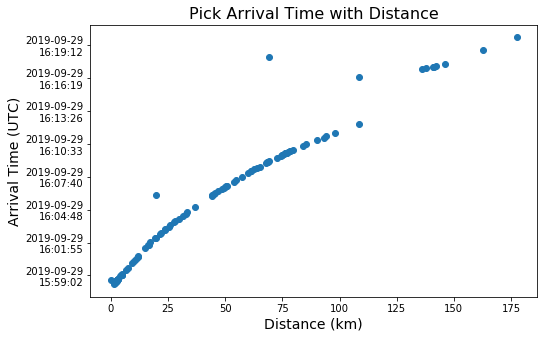

In [13]:
dist = phase_df['Distance'].values
time = phase_df['Arrival Time'].values
ind = dist.argsort()
dist = dist[ind]
time = time[ind]
time = matplotlib.dates.date2num(time)
fmt = matplotlib.dates.DateFormatter('%Y-%m-%d\n%H:%M:%S')

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(dist, time, 'o')
ax.yaxis.set_major_formatter(fmt)
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Arrival Time (UTC)', fontsize=14)
plt.title('Pick Arrival Time with Distance', fontsize=16)
plt.show()